In [1]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('/home/student/220962076_ML_LAB/Week 3/diabetes_csv.csv')

In [9]:
df.drop(['Age'], axis=1, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df_dummies=pd.get_dummies(df, columns=['Outcome'])
df_dummies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome_0,Outcome_1
0,6,148,72,35,0,33.6,0.627,False,True
1,1,85,66,29,0,26.6,0.351,True,False
2,8,183,64,0,0,23.3,0.672,False,True
3,1,89,66,23,94,28.1,0.167,True,False
4,0,137,40,35,168,43.1,2.288,False,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,True,False
764,2,122,70,27,0,36.8,0.340,True,False
765,5,121,72,23,112,26.2,0.245,True,False
766,1,126,60,0,0,30.1,0.349,False,True


In [12]:
df = df.fillna(df.median())

In [15]:
data_np = df.to_numpy()
print(data_np)

[[  6.    148.     72.    ...  33.6     0.627   1.   ]
 [  1.     85.     66.    ...  26.6     0.351   0.   ]
 [  8.    183.     64.    ...  23.3     0.672   1.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245   0.   ]
 [  1.    126.     60.    ...  30.1     0.349   1.   ]
 [  1.     93.     70.    ...  30.4     0.315   0.   ]]


In [14]:
df_shuffled = df.sample(frac=1, random_state=56).reset_index(drop=True)
test_size = 0.2
split_index = int(len(df_shuffled) * (1 - test_size))
df_train = df_shuffled.iloc[:split_index]
df_test = df_shuffled.iloc[split_index:]
X_train = df_train.drop(columns=['Outcome'])
y_train = df_train['Outcome']

X_test = df_test.drop(columns=['Outcome'])
y_test = df_test['Outcome']
print("Training features:\n", X_train.head())
print("Training targets:\n", y_train.head())
print("Test features:\n", X_test.head())
print("Test targets:\n", y_test.head())


Training features:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      132             80              0        0  26.8   
1            6      151             62             31      120  35.5   
2            3      173             82             48      465  38.4   
3            0      167              0              0        0  32.3   
4            7      152             88             44        0  50.0   

   DiabetesPedigreeFunction  
0                     0.186  
1                     0.692  
2                     2.137  
3                     0.839  
4                     0.337  
Training targets:
 0    0
1    0
2    1
3    1
4    1
Name: Outcome, dtype: int64
Test features:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614            1       79             75             30        0  32.0   
615            0      162             76             56      100  53.2   
616            7      125             86       

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Study_time_hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score_out_of_10': [2, 3, 5, 4, 6, 7, 8, 7, 9, 10]
}
df = pd.DataFrame(data)
df.to_csv('study_scores.csv', index=False)

In [17]:
df = pd.read_csv('study_scores.csv')
X = df['Study_time_hours'].values
y = df['Score_out_of_10'].values
X_b = np.c_[np.ones(X.shape[0]), X]

In [26]:
df

,Study_time_hours,Score_out_of_10
0,1,2
1,2,3
2,3,5
3,4,4
4,5,6
5,6,7
6,7,8
7,8,7
8,9,9
9,10,10


In [19]:
X_b

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [33]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
b_0, b_1 = theta_best
print(f'Intercept (B0): {b_0}')
print(f'Slope (B1): {b_1}')

Intercept (B0): 1.533333333333334
Slope (B1): 0.8303030303030304


In [36]:
study_time = 10
predicted_score = b_0 + b_1 * study_time
print(predicted_score)

9.83636363636364


In [21]:
y_pred = X_b @ theta_best

In [22]:
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f'RMSE: {rmse}')

RMSE: 0.6343691688790072


In [23]:
print('Predicted responses:', y_pred)


Predicted responses: [2.36363636 3.19393939 4.02424242 4.85454545 5.68484848 6.51515152
 7.34545455 8.17575758 9.00606061 9.83636364]


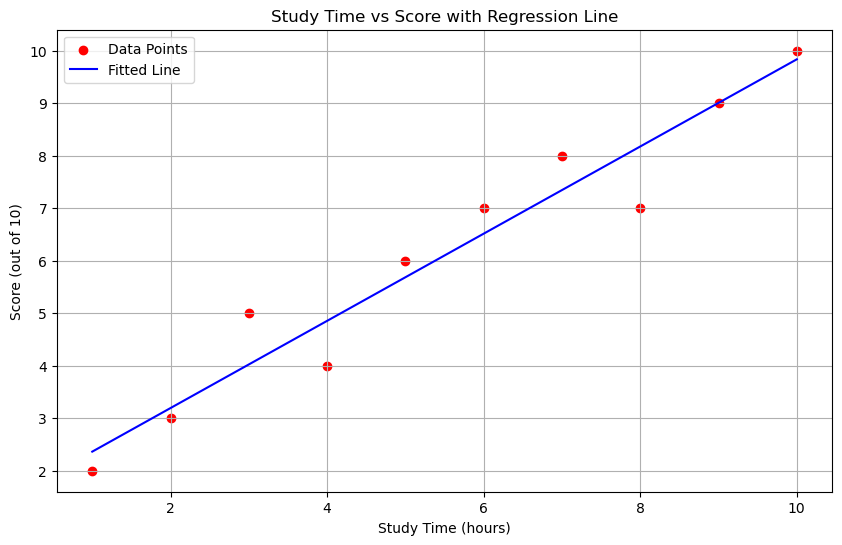

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, y_pred, color='blue', label='Fitted Line')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score (out of 10)')
plt.title('Study Time vs Score with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
mean_X = np.mean(X)
mean_y = np.mean(y)
print(mean_X)
print(mean_y)
print(np.sum((X - mean_X) * (y - mean_y)))
print(np.sum((X - mean_X) ** 2))
B1_ped = np.sum((X - mean_X) * (y - mean_y)) / np.sum((X - mean_X) ** 2)
B0_ped = mean_y - B1_ped * mean_X
print(f'Pedhazur Formula - Intercept (B0): {B0_ped}')
print(f'Pedhazur Formula - Slope (B1): {B1_ped}')

5.5
6.1
68.5
82.5
Pedhazur Formula - Intercept (B0): 1.5333333333333332
Pedhazur Formula - Slope (B1): 0.8303030303030303


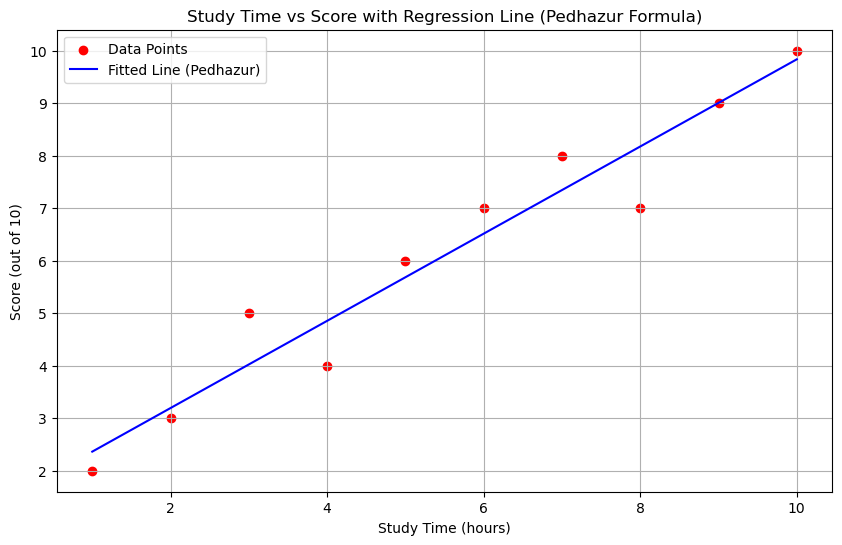

In [29]:
y_pred_ped = B0_ped + B1_ped * X
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, y_pred_ped, color='blue', label='Fitted Line (Pedhazur)')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score (out of 10)')
plt.title('Study Time vs Score with Regression Line (Pedhazur Formula)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
study_time = 10
predicted_score = B0_ped + B1_ped * study_time
print(predicted_score)

9.836363636363636


Gradient Descent Method - Intercept (b0): 1.3640072925764475
Gradient Descent Method - Slope (b1): 0.8546251160704182


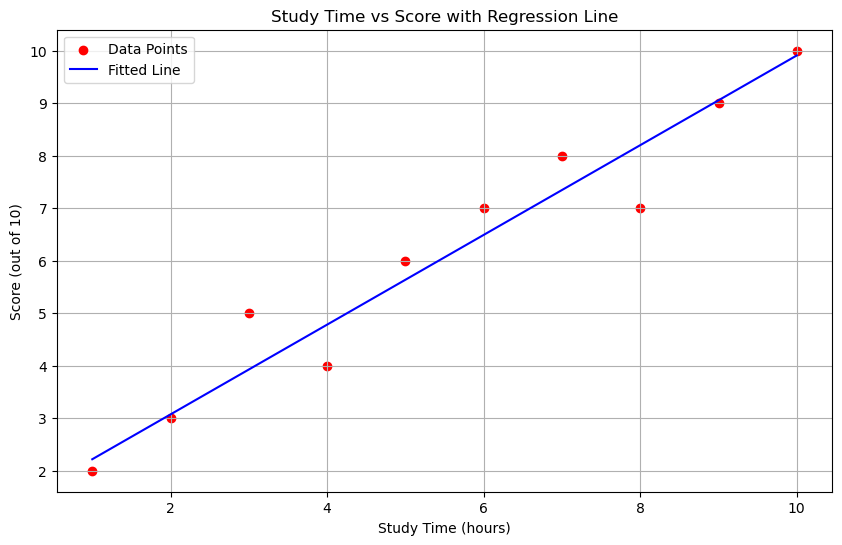

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('study_scores.csv')
X = df['Study_time_hours'].values
y = df['Score_out_of_10'].values

alpha = 0.01 
iterations = 1000 
m = len(X)  

b0 = 0
b1 = 0

for _ in range(iterations):
    y_pred = b0 + b1 * X
    
    d_b0 = (-1 / m) * np.sum(y - y_pred)
    d_b1 = (-1 / m) * np.sum((y - y_pred) * X)
    
    b0 -= alpha * d_b0
    b1 -= alpha * d_b1

print(f'Gradient Descent Method - Intercept (b0): {b0}')
print(f'Gradient Descent Method - Slope (b1): {b1}')

y_pred = b0 + b1 * X

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='red', label='Data Points')

plt.plot(X, y_pred, color='blue', label='Fitted Line')

plt.xlabel('Study Time (hours)')
plt.ylabel('Score (out of 10)')
plt.title('Study Time vs Score with Regression Line')
plt.legend()

plt.grid(True)
plt.show()


In [31]:
study_time = 10
predicted_score = b0 + b1 * study_time
print(predicted_score)

9.91025845328063
